# Estimador Máximo Verosímil

In [9]:
from scipy.stats import bernoulli, binom
import numpy as np 
import sympy 
from sympy.abc import x, z, n 

Existen distintos métodos para estimar parámetros desconocidos a partir de un conjunto de datos. El Estimador Máximo Verosímil (MLE) responde a la pregunta:

$$\text{¿Para qué valor del parámetro, los datos observados tienen la probabilidad más alta}$$

**Ejemplo 1.-** Una moneda se lanza 100 veces. Dado que salen 55 soles, encuentre el MLE para la probabilidad $p$ de obtener sol en un solo lanzamiento.


Podemos pensar en contar el número de caras en 100 lanzamientos como un experimento. Para un valor dado de $p$, la probabilidad de obtener $55$ soles en este experimento es la probabilidad binomial (la función de verosimilitud):
$$P(55 \ \text{soles}; p)=\binom{100}{55}p^{55}(1-p)^{45}.$$

Nota: La verosimilitud $P(\text{datos};p)$ cambia conforme el parámetro de interés, $p$, cambia.


**Definición.-** Para un conjunto de datos $D$, el MLE para el parámetro $p$ es el valor de $p$ que maximiza la verosimilitud $P(D;p)$.

Buscamos los puntos críticos:
$$\frac{d}{dp}P(D;p)=\binom{100}{55}(55p^{54}(1-p)^{45}-45p^{55}(1-p)^{44})=0.$$

Resolviendo para $p$,
\begin{align*}
55p^{54}(1-p)^{45}&=45p^{55}(1-p)^{44}\\
55(1-p)&=45p\\
55 &= 100p
\end{align*}
El MLE es $\hat{p}=0.55$

In [28]:
p = sympy.symbols("p", positive = True)
f = p**55*(1-p)**(100-55)
phat = sympy.solve(sympy.diff(f,p),p)[0]

print("El estimador MLE es", phat) 

El estimador MLE es 11/20


Generalmente, suele ser más fácil trabajar con el logaritmo natural de la función de verosimilitud. Para abreviar, esto se llama simplemente log-verosimilitud. Dado que la función $\ln(x)$ es una función creciente, los máximos de la verosimilitud y el logaritmo de la verosimilitud coinciden.

Hagamos otro ejemplo.

In [11]:
# Generamos un conjunto de datos tomados con distribución Bernoulli con parámetro 0.7

r = binom.rvs(1, 0.7, size=100)

r 

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [19]:
f = p**x*(1-p)**(1-x)

J = np.prod([f.subs(x, i) for i in r ] )

logJ = sympy.expand_log(sympy.log(J))


phat = sympy.solve(sympy.diff(logJ,p),p)[0]

print("El estimador MLE es", phat) 

El estimador MLE es 3/4


**Ejemplo 2.-** Suponga que se tiene una variable aleatoria discreta $X$ con densidad:
	\begin{align*}
	\mathbb{P}(X=0)&=\frac{2}{3}p,\\
	\mathbb{P}(X=1)&=\frac{1}{3}p,\\
	\mathbb{P}(X=2)&=\frac{2}{3}(1-p),\\
	\mathbb{P}(X=3)&=\frac{1}{3}(1-p)
	\end{align*}
con $p\in [0,1]$. Se toman las siguientes $10$ observaciones independientes de acuerdo a la distribución dada:
$$(3, 0, 2, 1, 3, 2, 1, 0, 2, 1).$$
Encuentra el MLE de $\theta$.

In [40]:
f = (2*p/3)**2*(p/3)**(3)*(2*(1-p)/3)**3*((1-p)/3)**2
logf = sympy.expand_log(sympy.log(f))
phat = sympy.solve(sympy.diff(logf,p),p)[0]

print("El estimador MLE es", phat)

El estimador MLE es 1/2


**Ejemplo 3.-** Una variable aleatoria, $X$, es exponencial con parámetro $\lambda>0$ si
$$P(X\leq x)=1-e^{-\frac{1}{\lambda} x}, x>0.$$

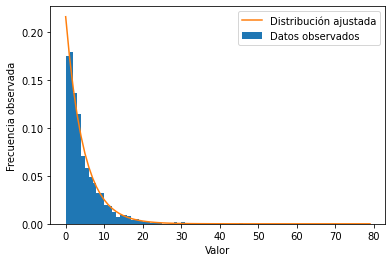

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

LAMBDA = 5
X = np.random.exponential(LAMBDA, 1000)

_, l = scipy.stats.expon.fit(X, floc=0)

pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, density='true')
plt.plot(pdf(x, scale=l))
plt.xlabel('Valor')
plt.ylabel('Frecuencia observada')
plt.legend(['Distribución ajustada', 'Datos observados', ]);

**Ejemplo 4.-** Suponga que la vida útil de los focos de cierta marca se modela mediante una distribución exponencial con parámetro (desconocido) $\lambda$. Probamos 5 focos y encontramos que tienen una vida útil de 2, 3, 1, 3 y 4 años, respectivamente. 

¿Cuál es el MLE para $\lambda$?

En este caso, la función de verosimilitud es
$$f(2,3,1,3,4; \lambda)=\frac{1}{λ^5}e^{-\frac{1}{\lambda}(2+3+1+3+4)}.$$

In [42]:
from sympy import exp
l = sympy.symbols("l", positive = True)
f = (1/l**5)*exp(-13/l)
logf = sympy.expand_log(sympy.log(f))
lhat = sympy.solve(sympy.diff(logf,l),l)[0]

print("El estimador MLE es", lhat)



El estimador MLE es 13/5


Ejercicios:

1. Investigación:

   a. Menciona 5 aplicaciones de la variable aleatoria exponencial.

   b. ¿Qué aplicaciones de la exponencial podrían ser de utilidad en tu carrera?

2. Crea una muestra aleatoria de 1000 datos tomados a partir de una muestra aleatoria exponencial.

3. Calcula el MLE para tu conjunto de datos.